Multivariate Time Series with RNN


Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data

Let's read in the data set:

In [2]:
df = pd.read_csv('energydata_complete.csv',index_col='date', infer_datetime_format=True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


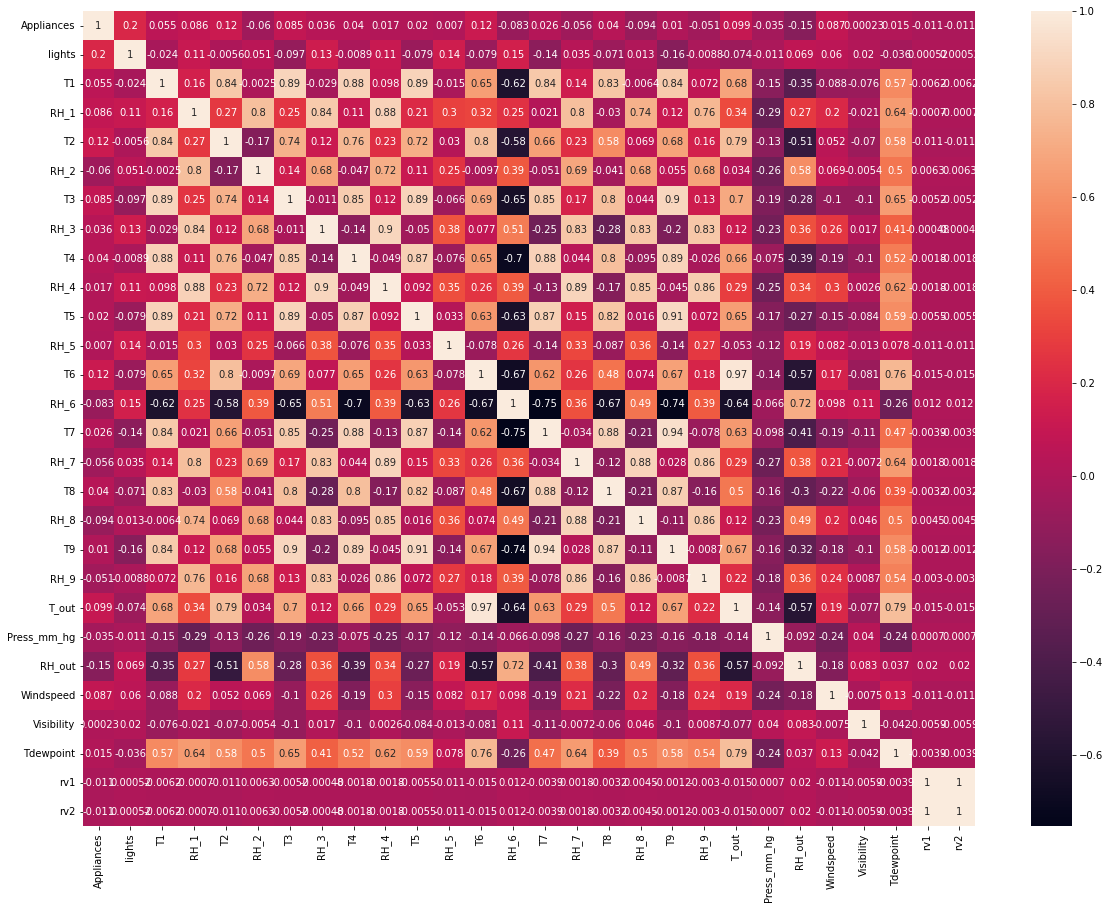

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

In [7]:
#df.columns

In [8]:
#df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
#df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
#df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [9]:
#drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
#             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
#df.drop(drop_list, axis = 1, inplace = True)

In [10]:
#df.info()

Let's imagine we want to predict just 24 hours into the future, we don't need 3 months of data for that, so let's save some training time and only select the last months data.

In [11]:
df = df.loc['2016-05-01':]

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [12]:
df = df.round(2)

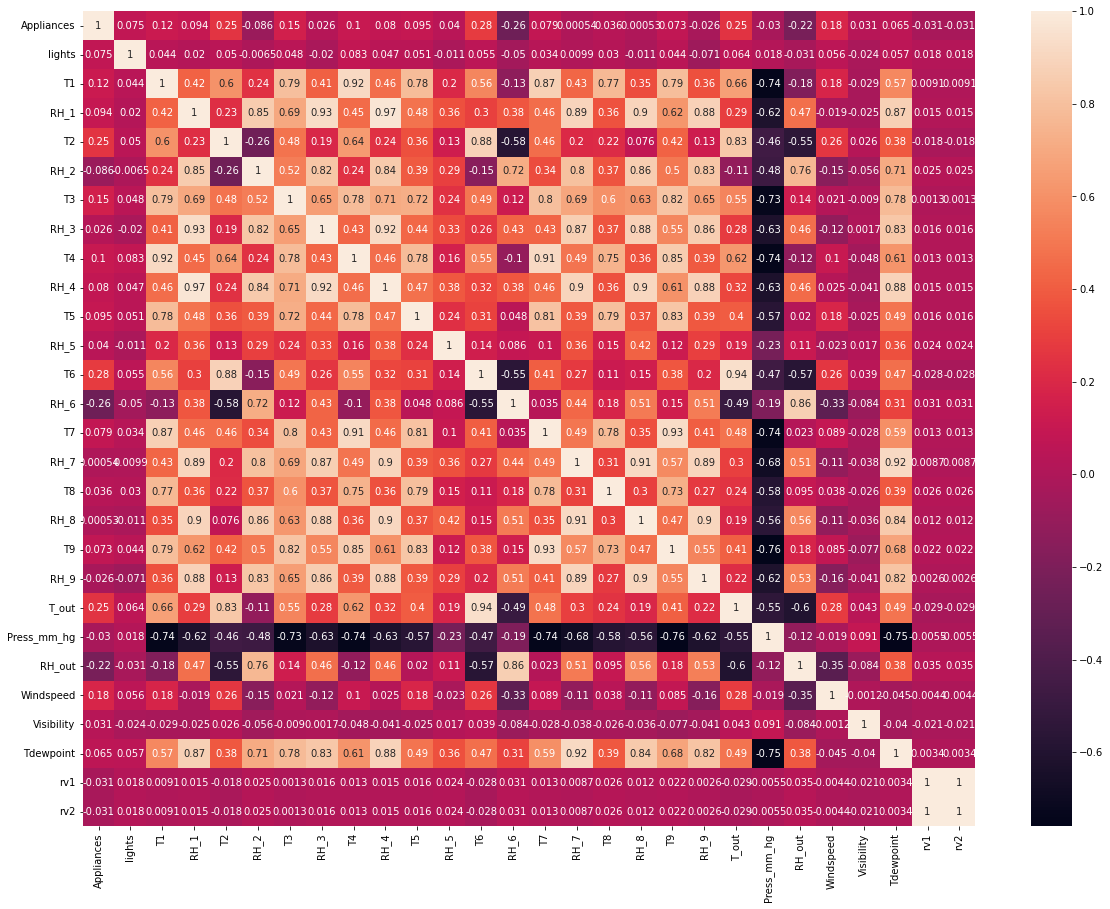

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

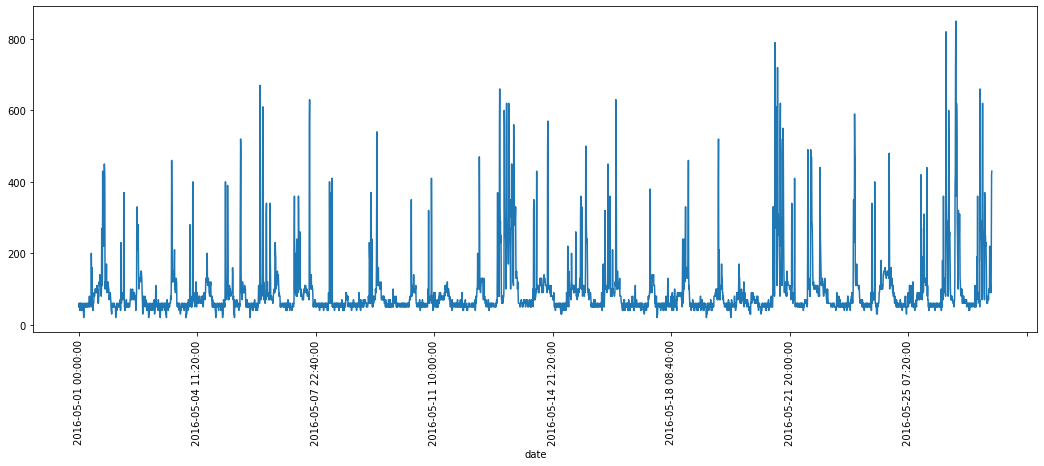

In [14]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

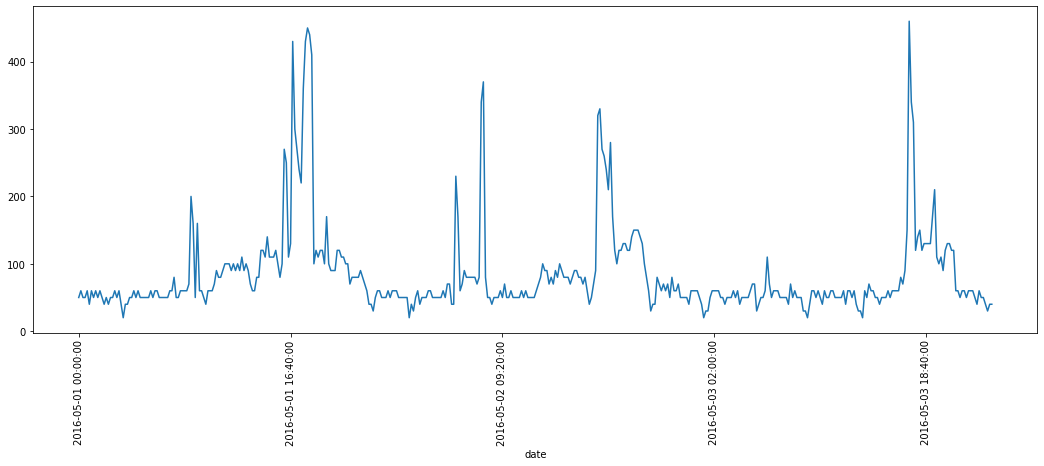

In [15]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:50:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

In [16]:
df1 = df.drop(df.columns[1:], axis = 1)

In [17]:
df1

,Appliances
date,
2016-05-01 00:00:00,50
2016-05-01 00:10:00,60
2016-05-01 00:20:00,50
2016-05-01 00:30:00,50
2016-05-01 00:40:00,60
...,...
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270


## Data Pre-Processing-1

### Train Test Split

In [18]:
len(df1)

3853

In [19]:
# How many rows per day? We know its every 10 min
24*60/10

144.0

In [20]:
test_days = 2

In [21]:
test_ind = test_days*144

In [22]:
test_ind

288

In [23]:
# Notice the minus sign in our indexing

train = df1.iloc[:-test_ind]
test = df1.iloc[-test_ind:]

In [24]:
train.shape, test.shape

((3565, 1), (288, 1))

### Scale Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(train)

MinMaxScaler()

In [28]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [31]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3565, 3421, 288, 144)

In [32]:
model = Sequential()

model.add(LSTM(144,input_shape=(length, train_scaled.shape[1])))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [34]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

C:\Users\engin\AppData\Local\Temp\ipykernel_17372\4162583110.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,


Epoch 1/10
3421/3421 [==============================] - 180s 52ms/step - loss: 0.0061 - val_loss: 0.0108
Epoch 2/10
3421/3421 [==============================] - 207s 61ms/step - loss: 0.0055 - val_loss: 0.0121
Epoch 3/10
3421/3421 [==============================] - 198s 58ms/step - loss: 0.0053 - val_loss: 0.0099
Epoch 4/10
3421/3421 [==============================] - 210s 61ms/step - loss: 0.0052 - val_loss: 0.0103
Epoch 5/10
3421/3421 [==============================] - 215s 63ms/step - loss: 0.0052 - val_loss: 0.0101
Epoch 6/10
3421/3421 [==============================] - 208s 61ms/step - loss: 0.0052 - val_loss: 0.0109


<AxesSubplot:>

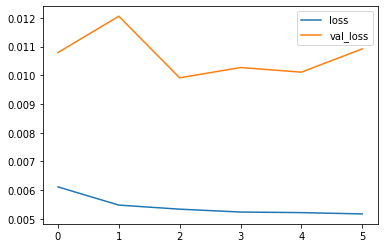

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [38]:
y_pred = model.predict(validation_generator)

In [39]:
eval_metrics(test_scaled[length:], y_pred)

r2_score: 0.5215051203244967 
mae: 0.05116535614219105 
mse: 0.010921338330122647 
rmse: 0.1045052071914249


In [40]:
n_features = train_scaled.shape[1]
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [41]:
eval_metrics(test_scaled, test_predictions)

r2_score: -0.7440099910005036 
mae: 0.15233988056149503 
mse: 0.05683068062947213 
rmse: 0.23839186359746453


## Inverse Transformations and Compare

In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

In [43]:
test['Predictions'] = true_predictions
test

C:\Users\engin\AppData\Local\Temp\ipykernel_17372\970091196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


,Appliances,Predictions
date,,
2016-05-25 18:10:00,170,104.536433
2016-05-25 18:20:00,310,99.494758
2016-05-25 18:30:00,120,95.006160
2016-05-25 18:40:00,120,91.609199
2016-05-25 18:50:00,120,87.955664
...,...,...
2016-05-27 17:20:00,100,13.246512
2016-05-27 17:30:00,90,13.246449
2016-05-27 17:40:00,270,13.246386


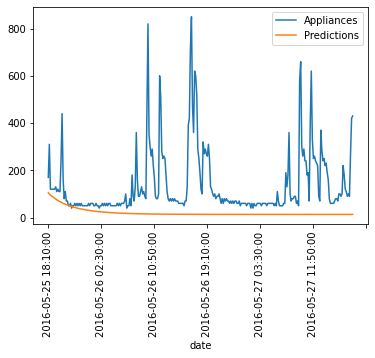

In [44]:
test.plot()
plt.xticks(rotation=90);

In [45]:
eval_metrics(test.Appliances, test.Predictions)

r2_score: -0.744009991000504 
mae: 117.3017080323512 
mse: 33694.91054521403 
rmse: 183.5617349700477


## Data Pre-Processing-2

### Train Test Split

In [46]:
len(df)

3853

In [47]:
# Notice the minus sign in our indexing

train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [48]:
train.shape, test.shape

((3565, 28), (288, 28))

### Scale Data

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
scaler.fit(train)

MinMaxScaler()

In [52]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

## Create the Model

In [53]:
length = 144 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [54]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(3565, 3421, 288, 144)

In [55]:
model = Sequential()

model.add(LSTM(144,input_shape=(length, train_scaled.shape[1])))

model.add(Dense(train_scaled.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [56]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [57]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/10


C:\Users\engin\AppData\Local\Temp\ipykernel_17372\4162583110.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,


3421/3421 [==============================] - 202s 58ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 2/10
3421/3421 [==============================] - 205s 60ms/step - loss: 0.0079 - val_loss: 0.0085
Epoch 3/10
3421/3421 [==============================] - 217s 63ms/step - loss: 0.0075 - val_loss: 0.0086
Epoch 4/10
3421/3421 [==============================] - 175s 51ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 5/10
3421/3421 [==============================] - 192s 56ms/step - loss: 0.0072 - val_loss: 0.0080
Epoch 6/10
3421/3421 [==============================] - 205s 60ms/step - loss: 0.0071 - val_loss: 0.0083
Epoch 7/10
3421/3421 [==============================] - 215s 63ms/step - loss: 0.0071 - val_loss: 0.0081
Epoch 8/10
3421/3421 [==============================] - 218s 64ms/step - loss: 0.0071 - val_loss: 0.0079
Epoch 9/10
3421/3421 [==============================] - 219s 64ms/step - loss: 0.0070 - val_loss: 0.0083
Epoch 10/10
3421/3421 [==============================] - 175s 51ms

<AxesSubplot:>

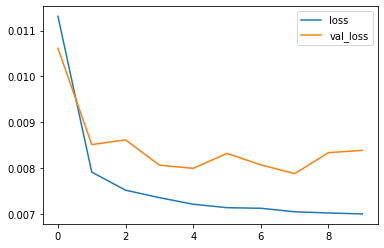

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [59]:
n_features = train_scaled.shape[1]
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [60]:
test_predictions

[array([0.11909133, 0.00535697, 0.6990201 , 0.40625063, 0.5284731 ,
        0.4459157 , 0.40551564, 0.42157012, 0.7133256 , 0.3906205 ,
        0.319777  , 0.338342  , 0.6614686 , 0.01089253, 0.6029571 ,
        0.39863747, 0.5104636 , 0.3312019 , 0.52107495, 0.34187084,
        0.6147443 , 0.5129037 , 0.44162616, 0.20072033, 0.6122817 ,
        0.57442695, 0.51100904, 0.5187648 ], dtype=float32),
 array([0.11729637, 0.00491279, 0.6952205 , 0.4182902 , 0.5169896 ,
        0.46170974, 0.39143294, 0.42676687, 0.70201594, 0.38705164,
        0.32893088, 0.3144695 , 0.65308666, 0.04069541, 0.5961294 ,
        0.4141327 , 0.5067132 , 0.3493568 , 0.509127  , 0.34722868,
        0.6189489 , 0.50439847, 0.46724248, 0.19654894, 0.6345525 ,
        0.6085113 , 0.5088113 , 0.51279324], dtype=float32),
 array([0.11076258, 0.00540078, 0.6878544 , 0.42829055, 0.5018762 ,
        0.4773873 , 0.3777284 , 0.43048006, 0.6894302 , 0.38560116,
        0.33657667, 0.2983399 , 0.6376519 , 0.07695563, 0.5888

In [61]:
test_scaled

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

## Inverse Transformations and Compare

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,111.700326,0.160709,24.493248,38.252830,23.980059,35.456145,24.995382,36.746107,24.193279,37.329276,...,21.913805,37.265179,16.699761,755.794204,57.563588,2.007203,41.736901,8.307815,25.545122,25.932677
1,110.318203,0.147384,24.470944,38.585724,23.836860,35.987298,24.894831,36.844429,24.114112,37.250618,...,21.849286,37.381390,16.802353,755.600285,59.510428,1.965489,43.073149,8.883841,25.435300,25.634278
2,105.287188,0.162024,24.427705,38.862234,23.648396,36.514535,24.796981,36.914683,24.026011,37.218650,...,21.788890,37.547594,16.776269,755.418099,61.474922,1.904499,43.836756,9.362418,25.326560,25.535171
3,99.394482,0.226512,24.383637,39.094618,23.455404,37.049475,24.711330,36.978354,23.949801,37.223251,...,21.739584,37.757656,16.652387,755.282541,63.429390,1.861026,44.391866,9.740538,25.257416,25.441570
4,93.722053,0.282858,24.337505,39.272889,23.265445,37.544261,24.637526,37.038398,23.881311,37.261246,...,21.698364,38.003564,16.462755,755.175317,65.324551,1.834587,44.847409,10.034305,25.221490,25.386234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,46.166333,0.703978,22.110783,39.218457,19.197082,42.650383,22.881861,38.143575,22.024710,38.337488,...,21.048161,40.743225,7.238913,763.848916,85.688954,2.904285,46.969976,4.830810,26.003674,26.178911
284,46.167455,0.704087,22.110767,39.218588,19.196987,42.650571,22.881878,38.143540,22.024703,38.337383,...,21.048274,40.743220,7.238751,763.848745,85.688755,2.904051,46.970080,4.830564,26.003653,26.178926
285,46.168694,0.704197,22.110752,39.218708,19.196898,42.650742,22.881893,38.143497,22.024694,38.337275,...,21.048384,40.743197,7.238600,763.848579,85.688519,2.903819,46.970166,4.830322,26.003629,26.178940
286,46.170013,0.704312,22.110737,39.218821,19.196813,42.650894,22.881905,38.143450,22.024683,38.337163,...,21.048491,40.743159,7.238458,763.848411,85.688248,2.903588,46.970230,4.830087,26.003605,26.178949


In [63]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.1,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.1,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.1,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.1,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.1,55.17,2.00,30.83,7.28,10.27,10.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.2,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.2,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.2,56.33,3.67,25.33,13.27,29.20,29.20


In [64]:
for i in test.columns:
    print(i)
    eval_metrics(test[i], true_predictions[i])
    print("--"*15)

Appliances
r2_score: -0.4310639926266939 
mae: 91.76724382326938 
mse: 27648.679459898427 
rmse: 166.27892067215984
------------------------------
lights
r2_score: -0.046502439032745535 
mae: 2.2964996562546327 
mse: 30.703410558764784 
rmse: 5.541065832379614
------------------------------
T1
r2_score: -14.573884037186394 
mae: 1.879641332332459 
mse: 4.080120115260212 
rmse: 2.0199307204110273
------------------------------
RH_1
r2_score: -1.8542208354920313 
mae: 4.4562022705282995 
mse: 25.859169988707638 
rmse: 5.085191244064243
------------------------------
T2
r2_score: -8.44966473586041 
mae: 4.7396342640949625 
mse: 26.890296444038036 
rmse: 5.1855854485330815
------------------------------
RH_2
r2_score: -0.3720910968426705 
mae: 3.5773672479929175 
mse: 18.910369464141617 
rmse: 4.348605462000619
------------------------------
T3
r2_score: -7.785145335026771 
mae: 3.178523814981906 
mse: 12.343782987024937 
rmse: 3.5133720251383767
------------------------------
RH_3
r2_scor

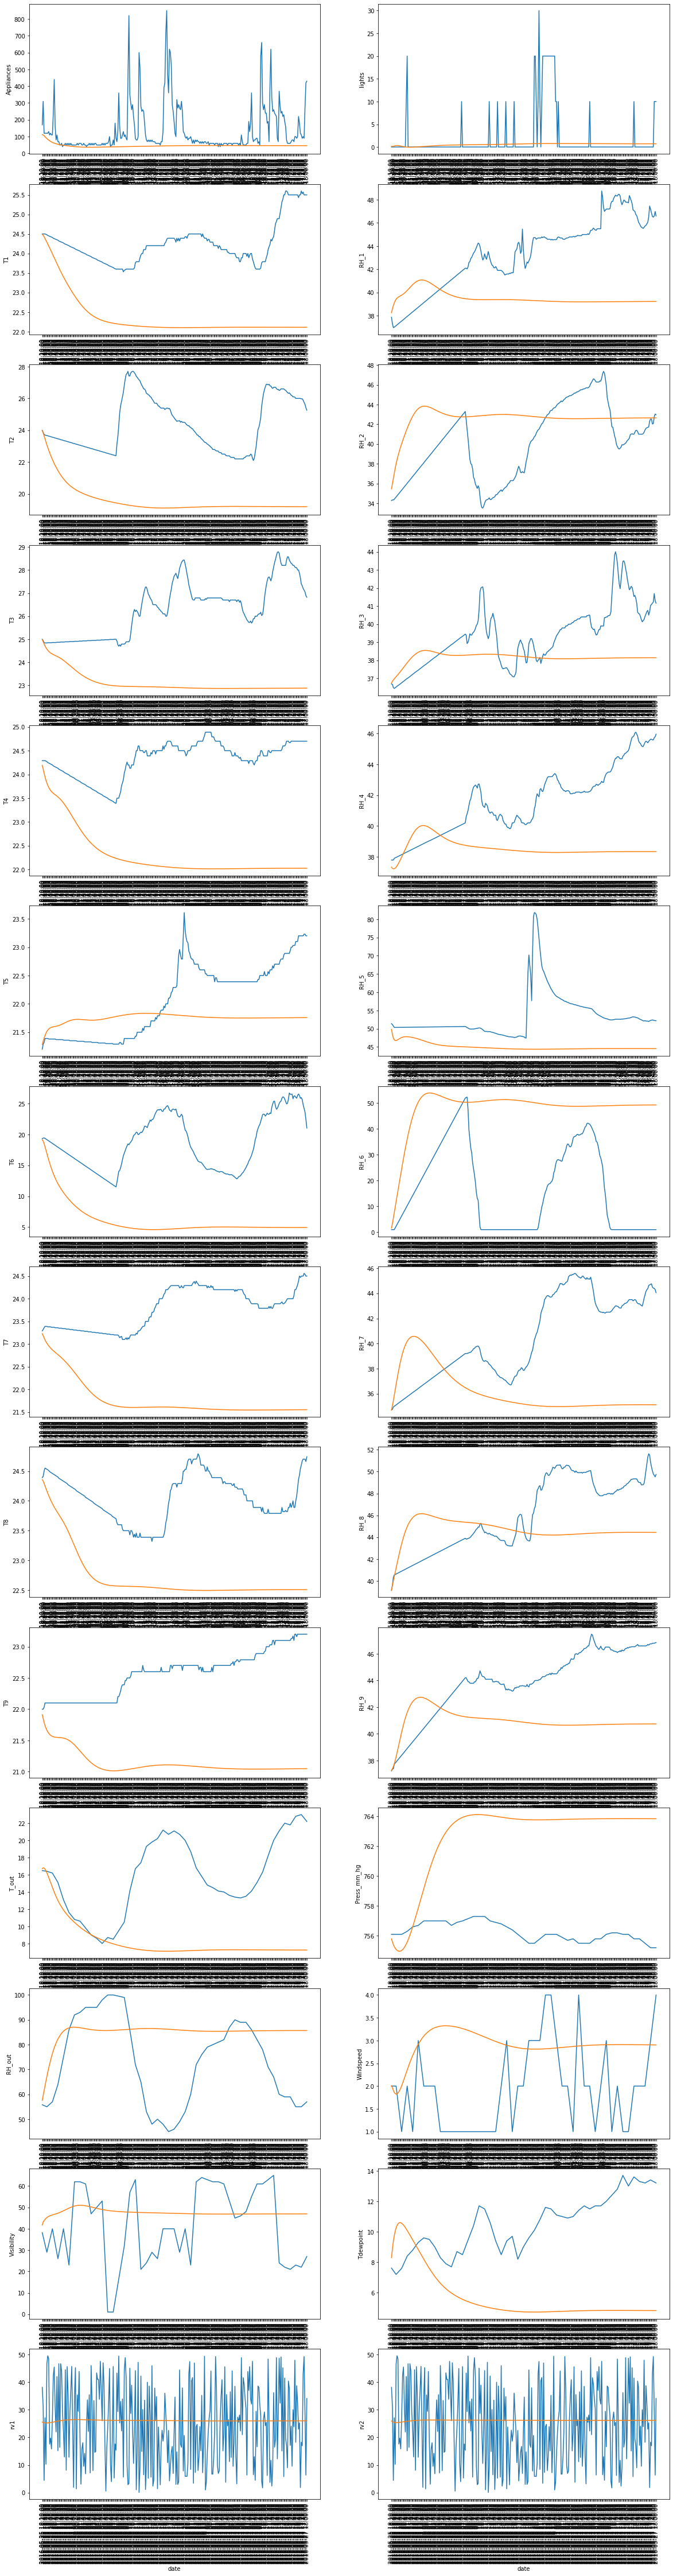

In [65]:
index = 0
plt.figure(figsize = (20, 80))

for i in test.columns:
    index += 1
    test_eva = pd.DataFrame(test[i])
    test_eva["predictions"] = true_predictions[i].values
    plt.subplot(14, 2, index)
    sns.lineplot(x = test_eva.index, y = test_eva[i], data = test_eva)
    sns.lineplot(x = test_eva.index, y = test_eva["predictions"], data = test_eva)
    plt.xticks(rotation=90);

## Arrangment of Dataset for RNN Model Manually

### Scale

In [66]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [67]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [68]:
f_columns = df.columns[1:]

f_transformer = MinMaxScaler()
target_transformer = MinMaxScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
target_transformer = target_transformer.fit(train[['Appliances']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Appliances'] = target_transformer.transform(train[['Appliances']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Appliances'] = target_transformer.transform(test[['Appliances']])

C:\Users\engin\AppData\Local\Temp\ipykernel_17372\351092723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
C:\Users\engin\AppData\Local\Temp\ipykernel_17372\351092723.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Appliances'] = target_transformer.transform(train[['Appliances']])
C:\Users\engin\AppData\Local\Temp\ipykernel_17372\351092723.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

### Define a Function for Creating Time Steps 

In [69]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys) #x = np.asarray(x).astype('float32').

In [70]:
time_steps = 144

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Appliances, time_steps)
X_test, y_test = create_dataset(test, test.Appliances, time_steps)

print(X_train.shape, y_train.shape)

(3421, 144, 28) (3421,)


## Model Building with LSTM

In [71]:
model = Sequential()
model.add(Bidirectional(LSTM(units=144, input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [72]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [73]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          shuffle=False,
          callbacks=[early_stop])

Epoch 1/30
75/75 [==============================] - 33s 349ms/step - loss: 0.0240 - val_loss: 0.0262
Epoch 2/30
75/75 [==============================] - 24s 320ms/step - loss: 0.0171 - val_loss: 0.0125
Epoch 3/30
75/75 [==============================] - 22s 288ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 4/30
75/75 [==============================] - 26s 342ms/step - loss: 0.0100 - val_loss: 0.0123
Epoch 5/30
75/75 [==============================] - 27s 364ms/step - loss: 0.0107 - val_loss: 0.0129


<AxesSubplot:>

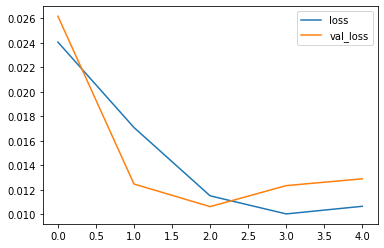

In [74]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [75]:
y_pred = model.predict(X_test)

In [76]:
eval_metrics(y_test, y_pred)

r2_score: 0.1498146288174662 
mae: 0.0885330992837862 
mse: 0.01940493509210003 
rmse: 0.13930159759349506


### Inverse Transform

In [77]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [78]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
date,,
2016-05-26 18:10:00,120.0,120.351318
2016-05-26 18:20:00,100.0,101.914696
2016-05-26 18:30:00,320.0,91.515724
2016-05-26 18:40:00,270.0,110.763847
2016-05-26 18:50:00,290.0,115.952568
...,...,...
2016-05-27 17:20:00,100.0,163.007416
2016-05-27 17:30:00,90.0,148.454697
2016-05-27 17:40:00,270.0,133.960541


In [79]:
eval_metrics(y_test_inv.flatten(), y_pred_inv.flatten())

r2_score: 0.1498146112650155 
mae: 68.17048680896147 
mse: 11505.186253635728 
rmse: 107.26223125422912


### Plot Prediction

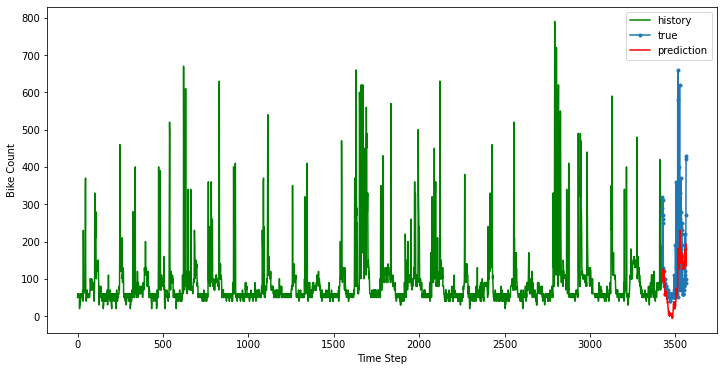

In [80]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

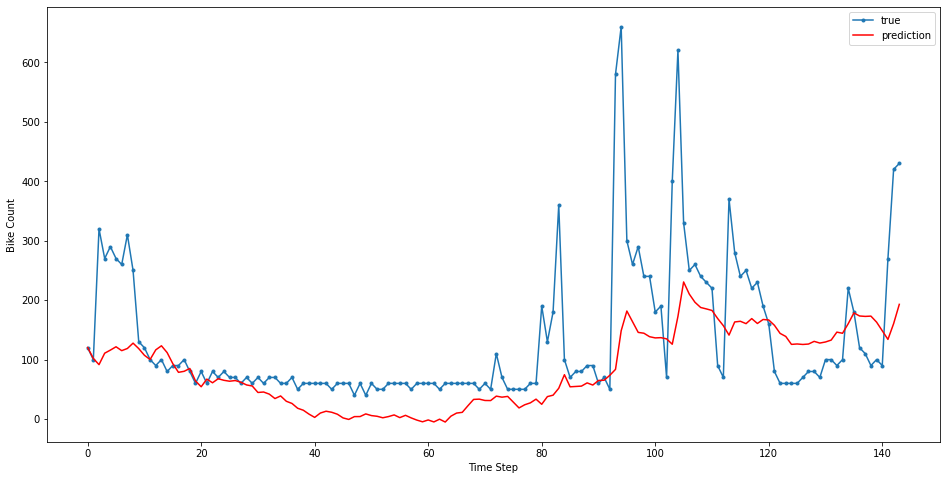

In [81]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## Forecast and Comparing with Test Data

In [82]:
test_ev = test.iloc[:,1:].values

In [83]:
n_features = train.shape[1]
test_predictions = []

first_eval_batch = train[-time_steps:].values
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = test_ev.reshape((test_ev.shape[0], 1, test_ev.shape[1]))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    test_predictions.append(current_pred)
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,test.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [84]:
true_predictions = target_transformer.inverse_transform(np.array(test_predictions).reshape(1,-1))

In [85]:
df.iloc[-test_ind:]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,0.700170,0.392043,0.530072,0.410645,0.406162,0.419133,0.727143,0.411525,...,0.537037,0.340249,0.605738,0.526316,0.418816,0.200,0.552833,0.533728,0.763058,0.763058
2016-05-25 18:20:00,310,0,0.700170,0.371790,0.518845,0.412429,0.397759,0.417548,0.727143,0.411525,...,0.537037,0.346243,0.605328,0.526316,0.416711,0.200,0.522167,0.528402,0.623374,0.623374
2016-05-25 18:30:00,120,0,0.700170,0.359494,0.508420,0.412429,0.385154,0.408562,0.727143,0.411525,...,0.542593,0.347626,0.604508,0.526316,0.414474,0.200,0.491667,0.523669,0.087853,0.087853
2016-05-25 18:40:00,120,0,0.700170,0.360940,0.506014,0.414511,0.383754,0.405920,0.727143,0.416515,...,0.555556,0.362840,0.603689,0.526316,0.412237,0.200,0.461167,0.518935,0.542526,0.542526
2016-05-25 18:50:00,120,0,0.698467,0.363472,0.504411,0.418079,0.383754,0.408034,0.725714,0.417877,...,0.555556,0.366989,0.603279,0.526316,0.410132,0.200,0.430500,0.513609,0.205323,0.205323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,0.882453,0.706691,0.681636,0.641392,0.714286,0.654863,0.785714,0.765426,...,0.759259,0.781005,0.861885,0.486842,0.416711,0.333,0.311167,0.871598,0.862317,0.862317
2016-05-27 17:30:00,90,0,0.870528,0.704521,0.670409,0.642878,0.704482,0.658034,0.785714,0.765426,...,0.759259,0.781005,0.856557,0.486842,0.421053,0.350,0.325000,0.869822,0.985992,0.985992
2016-05-27 17:40:00,270,10,0.870528,0.708137,0.660786,0.663396,0.693277,0.682875,0.785714,0.771779,...,0.759259,0.781005,0.851230,0.486842,0.425395,0.367,0.338833,0.868047,0.584150,0.584150


In [86]:
df_test = pd.DataFrame(df.iloc[-test_ind:]["Appliances"], index = test.index)
df_test["predictions"] = true_predictions[0]
df_test

,Appliances,predictions
date,,
2016-05-25 18:10:00,170,10.746583
2016-05-25 18:20:00,310,-3.780832
2016-05-25 18:30:00,120,-10.214380
2016-05-25 18:40:00,120,-9.112548
2016-05-25 18:50:00,120,-13.983188
...,...,...
2016-05-27 17:20:00,100,152.213043
2016-05-27 17:30:00,90,143.840866
2016-05-27 17:40:00,270,136.468735


<AxesSubplot:xlabel='date'>

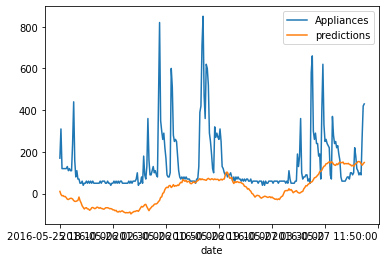

In [87]:
df_test.plot()